# FOREX ANALYSIS USING THE FRANFURTER API PROJECT

## Author(s): Nfayem Imoro

The program performs exploratory data analysis on the forex rates using the frankfurter API provided by the European Central Bank to produce a report that shows trends and insights gleaned from the following questions:
1. How has the exchange rate of the Euro (EUR) against the US dollar (USD) changed over time?
2. What is the distribution of the exchange rate for the Chinese Yuan (CNY) against the Euro (EUR)?
3. Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
4. Is there a correlation between the exchange rates of the Canadian Dollar (CAD) and the American Dollar (USD)?

## Import the relevant libraries and establish a connection to the Frankfurter API

In [12]:
# Import relevant libraries
import requests  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
from scipy.stats import linregress

# Setting display options for pandas DataFrame to show more rows and columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)

# Defining the host for the Frankfurter API
host = "api.frankfurter.app"

# Constructing the URL for fetching exchange rate data for a specific time range
url = f"https://{host}/2013-01-01..2023-12-31"

# Printing the constructed URL to the console for verification
print()
print(url)
print()


https://api.frankfurter.app/2013-01-01..2023-12-31



## Create the required Data Frame and perform a simple summary statistic

In [2]:
# Sending a GET request to the Frankfurter API to retrieve exchange rate data
response = requests.get(url)

# Parsing the JSON response into a Python dictionary
data = response.json()

# Creating a pandas DataFrame from the JSON data
eur_df = pd.DataFrame(data)

# Normalizing the "rates" column of the DataFrame to expand nested data into separate columns
eur_df_rates = pd.json_normalize(eur_df["rates"])

# Resetting the index of the DataFrame to default integer index
eur_df = eur_df.reset_index()

# Renaming the previous index column as "index_date"
eur_df = eur_df.rename(columns={"index": "index_date"})

# Convert the 'Date' column to DateTime format
eur_df["index_date"] = pd.to_datetime(eur_df["index_date"], format="ISO8601")

# Dropping the "rates" column from the DataFrame
eur_df = eur_df.drop("rates", axis=1)

# Concatenating the DataFrame containing the index and the normalized rates DataFrame horizontally
eur_df = pd.concat([eur_df, eur_df_rates], axis=1)

# Display truncated Info of Data Frame
print()
eur_df.info(verbose=False, memory_usage="deep")
print()

# Generate descriptive statistics for the Data Frame
eur_df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Columns: 39 entries, index_date to ISK
dtypes: datetime64[ns](1), float64(34), int64(1), object(3)
memory usage: 270.3 KB



,count,mean,min,25%,50%,75%,max,std
index_date,574,2018-06-28 12:00:00,2012-12-31 00:00:00,2015-09-29 18:00:00,2018-06-28 12:00:00,2021-03-27 06:00:00,2023-12-25 00:00:00,NaN
amount,574.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
AUD,574.0,1.532103,1.229,1.4684,1.5464,1.60125,1.8383,0.094395
BGN,574.0,1.955118,1.5646,1.9558,1.9558,1.9558,1.9558,0.016328
BRL,574.0,4.452196,2.5497,3.459,4.326,5.37515,6.801,1.156414
CAD,574.0,1.458304,1.293,1.42195,1.4639,1.504325,1.5971,0.064165
CHF,574.0,1.101135,0.93333,1.0588,1.0894,1.1539,1.2497,0.077833
CNY,574.0,7.644716,6.6044,7.34895,7.7125,7.884475,8.6674,0.418751
CZK,574.0,26.014655,23.376,25.448,25.856,27.029,28.111,1.105995
DKK,574.0,7.450612,7.4334,7.4399,7.45015,7.4605,7.4731,0.011135


## Conclusions drawn from the simple summary statistic

## Answer the following Questions

### 1. How has the exchange rate of the Euro (EUR) against the US dollar (USD) changed over time?


**********  A LINE CHART TO SHOW FLUCTUATIONS IN EXCHANGE RATE OF THE EURO AGAINST THE US DOLLAR OVER TIME  **********



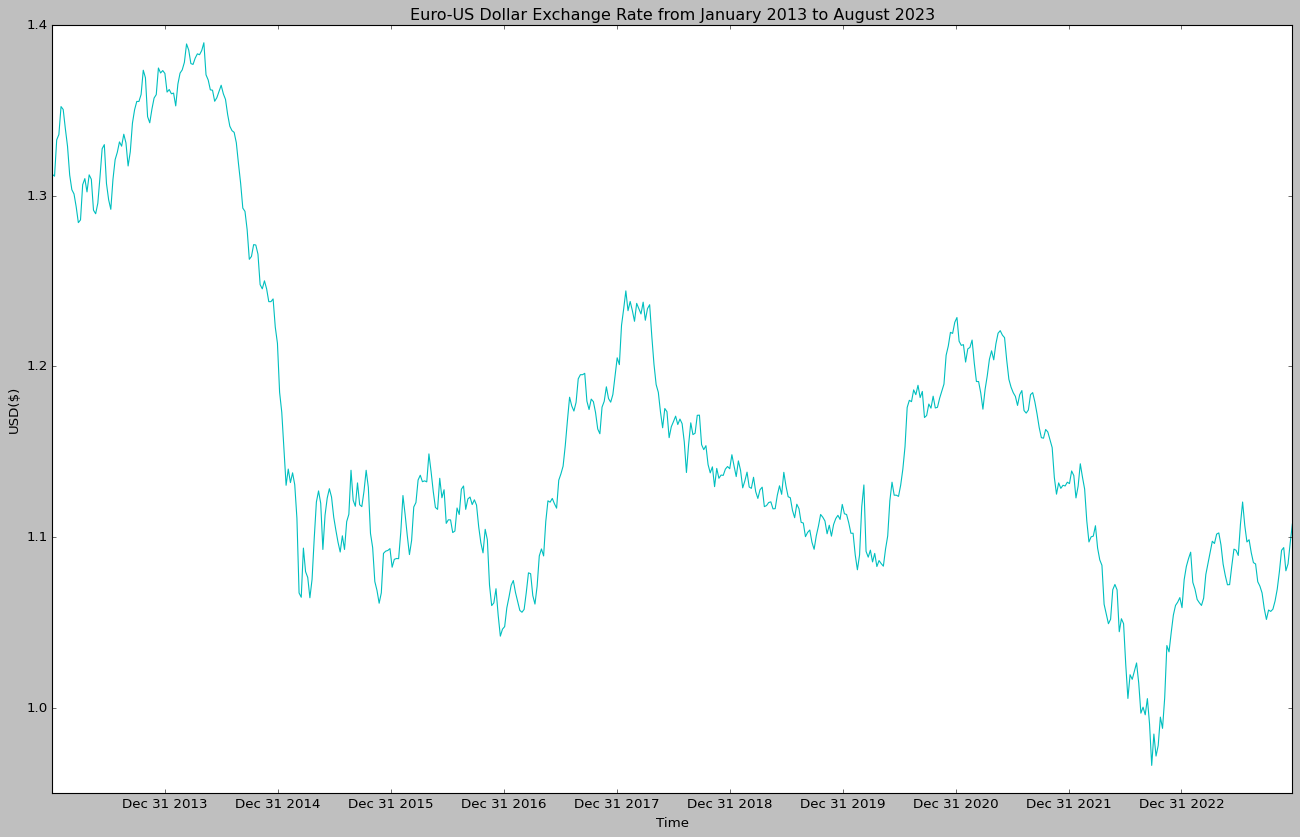


Observation:

         The exchange rate of the Euro to the US dollar reached its highest peak at approximately 1 EUR to 1.3896 USD
         
         in the first half of 2014 and has since observed an overall decline, recording its lowest value at around 
         
         1 EUR to 0.9662 USD in the second half of 2022. Overall there appears to be a degree of stability in the
         
         exchange rate of EUR/USD pair over the observed period.
      


In [3]:
# Keep specific columns to create DataFrames for USD exchange rates
eur_usd_df = eur_df[["index_date", "USD"]]

# Set the style of the plot to grayscale
plt.style.use("classic")

# Define the dimensions of the plot
plt.figure(figsize=(20, 12))

# Create a line plot of the EUR/USD exchange rate
sns.lineplot(data=eur_usd_df, x="index_date", y="USD", color="c", marker=None)

# Define the label of the x-axis (abscissa)
plt.xlabel("Time")

# Define the label of the y-axis (ordinate)
plt.ylabel("USD($)")

# Define the title of the plot
plt.title("Euro-US Dollar Exchange Rate from January 2013 to August 2023")

# Set x-axis ticks to show only years
plt.xticks(pd.date_range(start="2013-01-01", end="2023-08-31", freq="YE"))

# Set plot to exclude gridlines
plt.grid(False)

# Print a message indicating the purpose of the plot
print()
print("**********  A LINE CHART TO SHOW FLUCTUATIONS IN EXCHANGE RATE OF THE EURO AGAINST THE US DOLLAR OVER TIME  **********")
print()

# Display the plot
plt.show()

# Print a message indicating the observation made from analyzing the line plot
print()
print("Observation:")
print("""
         The exchange rate of the Euro to the US dollar reached its highest peak at approximately 1 EUR to 1.3896 USD
         
         in the first half of 2014 and has since observed an overall decline, recording its lowest value at around 
         
         1 EUR to 0.9662 USD in the second half of 2022. Overall there appears to be a degree of stability in the
         
         exchange rate of EUR/USD pair over the observed period.
      """)

### 2. What is the distribution of the exchange rate for the Chinese Yuan (CNY) against the Euro (EUR)?


**********  A HISTOGRAM TO SHOW THE DISTRIBUTION OF EXCHANGE RATES OF THE CHINESE YUAN AGAINST THE EURO  **********



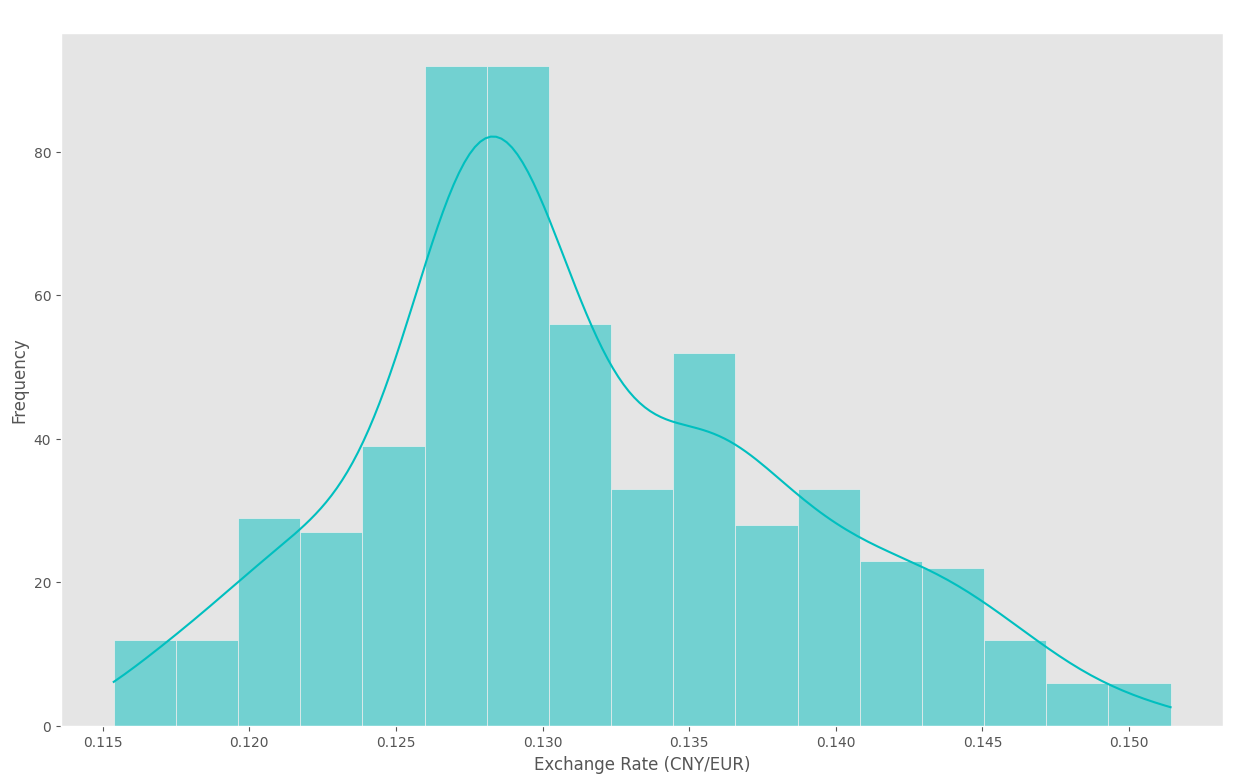


Summary statistics for the exchange rate (CNY/EUR):

mean                   0.131207
std                    0.007288
min                    0.115375
max                    0.151414
median                 0.129660
mode                   0.125480
25th percentile        0.126832
75th percentile        0.136074
Interquartile Range    0.009242
kurtosis              -0.263793
skewness               0.386138
Name: EUR, dtype: float64

Observation:

         The exchange rate of the Chinese Yuan to the Euro (CNY/EUR) tends to have lower exchange rates more 
         
         frequently, with relatively fewer instances of higher exchange rates. This trend suggests the CNY 
         
         (base currency) is weaker relative to the EUR (quote currency). In contrast to the aforementioned 
         
         insights gleaned from the more spread and closely uniform distribution, the positive skew of the 
         
         distribution suggests occasional periods of currency appreciation or re

In [59]:
# Keep specific columns to create DataFrames for CNY exchange rates
eur_cny_df = eur_df[["index_date", "CNY"]]

# Create a copy of the DataFrame 'eur_cny_df'
cny_eur_df = eur_cny_df.copy()

# Calculate the exchange rate from CNY to EUR and store it in a new column 'EUR'
cny_eur_df["EUR"] = 1 / cny_eur_df["CNY"]

# Replace all values under the 'CNY' column with the integer 1
cny_eur_df["CNY"] = 1

# Calculate summary statistics for the 'EUR' column
summary_stats = cny_eur_df["EUR"].agg(["mean", "std", "min", "max", "median"])

# Calculate the mode of the 'EUR' column
mode_value = cny_eur_df["EUR"].mode().iloc[0]

# Append the mode value to the summary statistics DataFrame
summary_stats.loc["mode"] = mode_value

# Calculate quartiles
quartiles = cny_eur_df["EUR"].quantile([0.25, 0.75])

# Append quartiles to the summary statistics DataFrame
summary_stats.loc["25th percentile"] = quartiles[0.25]
summary_stats.loc["75th percentile"] = quartiles[0.75]

# Calculate the interquartile range (IQR)
IQR = quartiles[0.75] - quartiles[0.25]

# Append the interquartile range to the summary statistics DataFrame
summary_stats.loc["Interquartile Range"] = IQR

# Calculate the kurtosis for the 'EUR' column
eur_kurtosis = cny_eur_df["EUR"].kurtosis()

# Append the kurtosis value to the summary statistics DataFrame
summary_stats.loc["kurtosis"] = eur_kurtosis

# Calculate the skewness for the 'EUR' column
eur_skewness = cny_eur_df["EUR"].skew()

# Append the skewness value to the summary statistics DataFrame
summary_stats.loc["skewness"] = eur_skewness

# Set the style of the plot to ggplot
plt.style.use("ggplot")

# Define the dimensions of the plot
plt.figure(figsize=(15, 9))

# Create a histogram of the CNY/EUR exchange rate
sns.histplot(data=cny_eur_df, x="EUR", kde=True, color="c")

# Define the label of the x-axis (abscissa)
plt.xlabel("Exchange Rate (CNY/EUR)")

# Define the label of the y-axis (ordinate)
plt.ylabel("Frequency")

# Define the title of the plot
plt.title("Histogram of Chinese Yuan-Euro Exchange Rate from January 2013 to August 2023")

# Set plot to exclude gridlines
plt.grid(False)

# Print a message indicating the purpose of the plot
print()
print("**********  A HISTOGRAM TO SHOW THE DISTRIBUTION OF EXCHANGE RATES OF THE CHINESE YUAN AGAINST THE EURO  **********")
print()

# Display the plot
plt.show()

# Print summary statistics for the exchange rate (CNY to EUR)
print()
print("Summary statistics for the exchange rate (CNY/EUR):")
print()
print(summary_stats)

# Print a message indicating the observation made from analyzing the histogram
print()
print("Observation:")
print("""
         The exchange rate of the Chinese Yuan to the Euro (CNY/EUR) tends to have lower exchange rates more 
         
         frequently, with relatively fewer instances of higher exchange rates. This trend suggests the CNY 
         
         (base currency) is weaker relative to the EUR (quote currency). In contrast to the aforementioned 
         
         insights gleaned from the more spread and closely uniform distribution, the positive skew of the 
         
         distribution suggests occasional periods of currency appreciation or relative strength of the Chinese 
         
         Yuan compared to the Euro. In general, this trading pair has lower volatility and fewer or infrequent 
         
         extreme fluctuations in exchange rates.
      """)

### 3. Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatie


**********  A BAR CHART TO COMPARE THE VOLATILITY OF THE GREAT BRITISH POUND AND THE JAPANESE YEN  **********



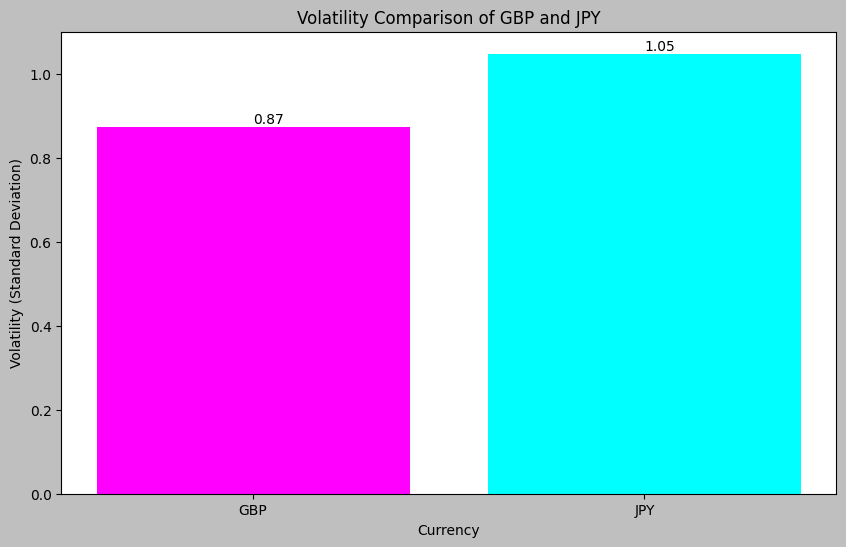


Observation:

         The Japanese Yen has relatively higher volatility compared to the Great British Pound. Thus
         
         suggesting relatively larger fluctuations in the Japanese Yen over time. 
      


In [8]:
# Keep specific columns to create DataFrames for GBP and JPY exchange rates
gbp_df = eur_df[["index_date", "GBP"]]
jpy_df = eur_df[["index_date", "JPY"]]

# Creating copies of the newly created DataFrames for GBP and JPY exchange rates
gbp_eur_df = gbp_df.copy()
jpy_eur_df = jpy_df.copy()

# Calculate the exchange rate from GBP and JPY to EUR and store it in a new column 'EUR'
gbp_eur_df["EUR"] = 1 / gbp_eur_df["GBP"]
jpy_eur_df["EUR"] = 1 / jpy_eur_df["JPY"]

# Replace all values under the 'GBP' and 'JPY' columns with the integer 1
gbp_eur_df["GBP"] = 1
jpy_eur_df["JPY"] = 1

# Calculating the percentage change for EUR/GBP and EUR/JPY exchange rates
gbp_eur_df["Percentage Change"] = gbp_eur_df["EUR"].pct_change() * 100
jpy_eur_df["Percentage Change"] = jpy_eur_df["EUR"].pct_change() * 100

# Computing the standard deviation of percentage changes for GBP and JPY exchange rates
gbp_volatility = gbp_eur_df["Percentage Change"].std()
jpy_volatility = jpy_eur_df["Percentage Change"].std()

# Set the style of the plot to grayscale
plt.style.use("grayscale")

# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot to compare the volatility (standard deviation) of GBP and JPY against EUR
bars = plt.bar(["GBP", "JPY"], [gbp_volatility, jpy_volatility], color=["magenta", "cyan"])

# Add data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Define the label of the x-axis (abscissa)
plt.xlabel("Currency")

# Define the label of the y-axis (ordinate)
plt.ylabel("Volatility (Standard Deviation)")

# Define the title of the plot
plt.title("Volatility Comparison of GBP and JPY")

# Set plot to exclude gridlines
plt.grid(False)

# Printing a message indicating the purpose of the plot
print()
print("**********  A BAR CHART TO COMPARE THE VOLATILITY OF THE GREAT BRITISH POUND AND THE JAPANESE YEN  **********")
print()

# Displaying the plot
plt.show()

# Printing a message indicating the observation made from analyzing the bar plot
print()
print("Observation:")
print("""
         The Japanese Yen has relatively higher volatility compared to the Great British Pound. Thus
         
         suggesting relatively larger fluctuations in the Japanese Yen over time. 
      """)

### 4. Is there a correlation between the exchange rates of the Canadian Dollar (CAD) and the American Dollar (USD)?


**********  A SCATTER CHART TO COMPARE THE PERCENTAGE CHANGE BETWEEN THE CANADIAN DOLLAR AND THE US DOLLAR  **********



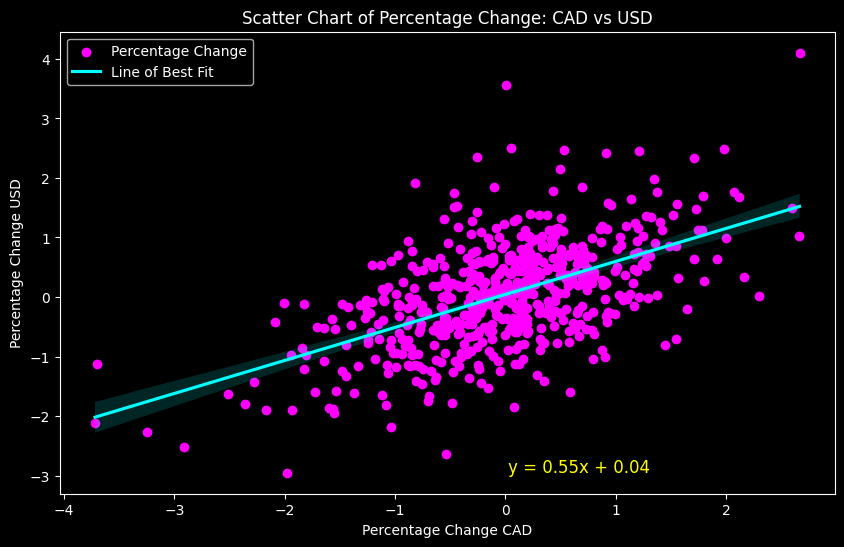


Observation:

         There is a moderate positive linear relationship of 0.55 between the percentage changes of the 
         
         Canadian dollar and the US dollar, suggesting some degree of association between their movements.
         
         However, this relationship is not perfectly synchronized, and it has limited predictive power. 
         
         Nonetheless, the silver lining is it provides some level of risk reduction through diversification 
         
         for investors holding Euro pairs of both base currencies in their portfolios. This benefit might 
         
         apply to other currency pairs of both the CAD and USD.
      


In [57]:
# Keep specific columns to create DataFrames for CAD exchange rates
cad_df = eur_df[["index_date", "CAD"]]

# Creating copies of the created DataFrames for CAD and USD exchange rates
cad_eur_df = cad_df.copy()
usd_eur_df = eur_usd_df.copy()

# Calculate the exchange rate from CAD and USD to EUR and store it in a new column 'EUR'
cad_eur_df["EUR"] = 1 / cad_eur_df["CAD"]
usd_eur_df["EUR"] = 1 / usd_eur_df["USD"]

# Replace all values under the 'GBP' and 'JPY' columns with the integer 1
cad_eur_df["CAD"] = 1
usd_eur_df["USD"] = 1

# Calculate percentage change for EUR/CAD and EUR/USD
cad_eur_df["Percentage Change"] = cad_eur_df["EUR"].pct_change() * 100
usd_eur_df["Percentage Change"] = usd_eur_df["EUR"].pct_change() * 100

# Merge the two DataFrames on the 'index_date' column
merged_df = pd.merge(cad_eur_df, usd_eur_df, on="index_date", suffixes=("_CAD", "_USD"))

# Calculate correlation coefficient
correlation = merged_df["Percentage Change_CAD"].corr(merged_df["Percentage Change_USD"])

# Set the style of the plot to dark background
plt.style.use("dark_background")

# Define the dimensions of the plot
plt.figure(figsize=(10, 6))

# Plotting data points for 'Percentage Change_CAD' and 'Percentage Change_USD' with magenta color
plt.scatter(
    merged_df["Percentage Change_CAD"],
    merged_df["Percentage Change_USD"],
    color="magenta",
    label="Percentage Change"
)

# Plotting the line of best fit
sns.regplot(
    x=merged_df["Percentage Change_CAD"],
    y=merged_df["Percentage Change_USD"],
    scatter=False,
    color="cyan",
    label="Line of Best Fit"
)

# Drop missing values prior to calculating slope and intercept
lnreg_df = merged_df.dropna(ignore_index=True)

# Calculate the slope and intercept of the line of best fit
slope, intercept = np.polyfit(lnreg_df["Percentage Change_CAD"], lnreg_df["Percentage Change_USD"], 1)

# Create the equation of the line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Add the equation as text on the plot
plt.text(
    lnreg_df["Percentage Change_CAD"].median(),
    lnreg_df["Percentage Change_USD"].min(),
    line_eq,
    fontsize=12,
    color="yellow"
)

# Define the label of the x-axis (abscissa)
plt.xlabel("Percentage Change CAD")

# Define the label of the y-axis (ordinate)
plt.ylabel("Percentage Change USD")

# Set legend for scatter plot
plt.legend()

# Define the title of the plot
plt.title("Scatter Chart of Percentage Change: CAD vs USD")

# Set plot to exclude gridlines
plt.grid(False)

# Printing a message indicating the purpose of the plot
print()
print("**********  A SCATTER CHART TO COMPARE THE PERCENTAGE CHANGE BETWEEN THE CANADIAN DOLLAR AND THE US DOLLAR  **********")
print()

# Displaying the plot
plt.show()

# Printing a message indicating the observation made from analyzing the scatter plot
print()
print("Observation:")
print(f"""
         There is a moderate positive linear relationship of {correlation:.2f} between the percentage changes of the 
         
         Canadian dollar and the US dollar, suggesting some degree of association between their movements.
         
         However, this relationship is not perfectly synchronized, and it has limited predictive power. 
         
         Nonetheless, the silver lining is it provides some level of risk reduction through diversification 
         
         for investors holding Euro pairs of both base currencies in their portfolios. This benefit might 
         
         apply to other currency pairs of both the CAD and USD.
      """)